# Efektywne programowanie w języku Python 

## wykład 11b

![alt text](images/pandas_logo.png "pandas_logo")

Pandas jest darmową biblioteką języka Python, która służy do analizy danych. Zawiera łatwe w użyciu struktury i narzędzia do analizy danych spotykane w języku R.

Biblioteka ta pozwala między innymi na:
- tworzenie własnych danych w odpowiednich strukturach,
- importowanie i eksportowanie danych do różnych plików,
- przygotowanie danych do analizy (pozbycie się anomalii w danych, np. brakujących wartości),
- analizę danych,
- prezentację danych.

In [1]:
# import pandas
import pandas as pd

print(pd.__version__) # wersja biblioteki
%matplotlib inline

0.21.0


## Struktury danych
Biblioteka pandas wprowadza dwie nowe struktury danych do Pythona: Series i DataFrame.

## 1. Serie
Seria to jednowymiarowy obiekt podobny do tablicy, listy, który może zawierać różnego rodzaju dane (liczby całkowite, zmiennoprzecinkowe, ciągi, obiekty Pythona, itd.). Każdy element serii ma przypisany indeks/etykietę (domyślnie od 0 do N, gdzie N jest długość serii minus 1).

In [2]:
from pandas import Series, DataFrame

s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'])
print(s)

0                7
1       Heisenberg
2             3.14
3      -1789710578
4    Happy Eating!
dtype: object


Alternatywnie, można zdefiniować indeksy elementów serii w trakcje jej definicji:

In [3]:
import numpy as np

# Series(dane, index=indeks)
s = Series(np.random.randn(5), index=['a', 'b', 'c', 'i', 'e'])
print(s)

a   -1.449360
b   -0.768502
c   -1.355523
i    0.218810
e    1.299274
dtype: float64


Konstruktor `Series` może przetwarzać słowniki Pythona:

In [5]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
print(Series(d))

a    0.0
b    1.0
c    2.0
dtype: float64


In [6]:
print(Series(d, index=['b', 'c', 'd', 'a']))

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64


In [7]:
print(Series(1, index=['a', 'b', 'c', 'd', 'e']))
print(Series(1., index=['a', 'b', 'c', 'd', 'e']))

a    1
b    1
c    1
d    1
e    1
dtype: int64
a    1.0
b    1.0
c    1.0
d    1.0
e    1.0
dtype: float64


### 1.1 Odwoływanie się do elementów serii

Struktura Series działa jak tablica. Można odwołać się do poszczególnego elementu serii za pomocą indeksu, używać logicznego indeksowania, itd.:

In [126]:
s = Series(np.random.randn(5), index=['a', 'b', 'c', 'i', 'e'])
print(s, '\n')

print(s[0], s[3])

a   -1.305915
b   -0.155206
c   -0.120740
i   -0.356496
e   -0.525657
dtype: float64 

-1.30591478057 -0.356496466338


In [127]:
print(s.get_value(3))
print(s.get_values())

-0.356496466338
[-1.30591478 -0.15520646 -0.12074021 -0.35649647 -0.52565684]


e:\github\python_tutorial_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


In [16]:
print(s.at[3])

ValueError: At based indexing on an non-integer index can only have non-integer indexers

In [128]:
print(s.at['a'])
print(s.iat[0])

-1.30591478057
-1.30591478057


In [18]:
print(s[:2])

a    0.243792
b    0.057053
dtype: float64


In [19]:
print(s[s > 0.5])

c    0.827326
dtype: float64


In [20]:
print(s[s > s.mean()])

a    0.243792
c    0.827326
dtype: float64


In [21]:
# wpółpraca z numpy
print(np.sin(s))

a    0.241384
b    0.057022
c    0.736124
i   -0.093414
e   -0.222156
dtype: float64


Do wybranych elementów możemy odwoływać się przez nazwę etykiety/indeksu (seria przypomina słownik Pythona).

In [22]:
print(s['a'], s[0], '\n')
print(s[['a', 'c', 'i']], '\n')
print(s.get('e'), '\n')
print(s.get('f', 5.)) # w przypadku braku wartości, wstaw 1 

0.243791577339 0.243791577339 

a    0.243792
c    0.827326
i   -0.093550
dtype: float64 

-0.224025545966 

5.0


### 1.2 Zmiana wartości wybranych elementów

In [25]:
s = Series(np.random.randn(5), index=['a', 'b', 'c', 'i', 'e'])
print(s, '\n')
print("stara wartosc:",  s[0])
s[0] = 10. 
print("nowa wartosc:",  s[0], '\n')

print("stara wartosc:",  s['b'])
s['b'] = 15. 
print("nowa wartosc:",  s['b'])

a    0.698278
b   -0.822316
c    0.483110
i   -0.244443
e   -1.491028
dtype: float64 

stara wartosc: 0.698278252485
nowa wartosc: 10.0 

stara wartosc: -0.822315758307
nowa wartosc: 15.0


In [28]:
s = Series(np.random.randn(5), index=['a', 'b', 'c', 'i', 'e'])
print("stare:\n", s, '\n')
s[s < s.mean()] = 1
print("nowe:\n",  s)

stare:
 a    1.426436
b   -0.089163
c    2.101461
i   -0.383113
e    0.281956
dtype: float64 

nowe:
 a    1.426436
b    1.000000
c    2.101461
i    1.000000
e    1.000000
dtype: float64


### 1.3 Operacje logiczne

In [29]:
s = Series(np.random.randn(5), index=['a', 'b', 'c', 'i', 'e'])
print(s, '\n')
print(s < 0)

a    0.065360
b   -0.130227
c    1.392875
i    1.113357
e    0.516081
dtype: float64 

a    False
b     True
c    False
i    False
e    False
dtype: bool


In [30]:
cities = Series({'Chicago': 1000, 'New York': 1300, 'Portland': 900,
                 'San Francisco': 1100, 'Austin': 450, 'Boston': None})
print(cities, '\n')

print('Seattle' in cities)
print('San Francisco' in cities)

Austin            450.0
Boston              NaN
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64 

False
True


### 1.4 Operacje matematyczne

In [31]:
s = Series(np.random.randn(5), index=['a', 'b', 'c', 'i', 'e'])
print(s, '\n')

print(s + s, '\n')
print(s + 2)

a   -0.956661
b    1.097682
c   -0.092139
i   -0.055645
e    0.795427
dtype: float64 

a   -1.913322
b    2.195364
c   -0.184277
i   -0.111290
e    1.590853
dtype: float64 

a    1.043339
b    3.097682
c    1.907861
i    1.944355
e    2.795427
dtype: float64


Można dodać dwie serie do siebie. Wynikiem jest seria z dodanymi wartościami na wspólnych indeksach. Wartości obu serii, które nie mają wspólnych indeksów będą miały wartości NULL/NaN (nie liczby).

In [32]:
print(s[['a', 'e']] + s[['i', 'e']])

a         NaN
e    1.590853
i         NaN
dtype: float64


In [33]:
print(cities[['Chicago', 'New York', 'Portland']])
print('\n')
print(cities[['Austin', 'New York']])
print('\n')
print(cities[['Chicago', 'New York', 'Portland']] + cities[['Austin', 'New York']])

Chicago     1000.0
New York    1300.0
Portland     900.0
dtype: float64


Austin       450.0
New York    1300.0
dtype: float64


Austin         NaN
Chicago        NaN
New York    2600.0
Portland       NaN
dtype: float64


In [34]:
print(s * 5)

a   -4.783306
b    5.488409
c   -0.460693
i   -0.278225
e    3.977133
dtype: float64


In [35]:
print(np.square(s))

a    0.915200
b    1.204905
c    0.008490
i    0.003096
e    0.632704
dtype: float64


### 1.5 Niezdefiniowane wartości, obiekty

In [36]:
print(cities, '\n')
print(cities.notnull()) # które są zdefiniowane

Austin            450.0
Boston              NaN
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64 

Austin            True
Boston           False
Chicago           True
New York          True
Portland          True
San Francisco     True
dtype: bool


In [37]:
print(cities.isnull()) # które nie są zdefiniowane

Austin           False
Boston            True
Chicago          False
New York         False
Portland         False
San Francisco    False
dtype: bool


In [38]:
print(cities[cities.isnull()]) # tylko te które nie są zdefiniowane 
cities[cities.isnull()] = 1
print()
print(cities.isnull())
print()
print(cities)

Boston   NaN
dtype: float64

Austin           False
Boston           False
Chicago          False
New York         False
Portland         False
San Francisco    False
dtype: bool

Austin            450.0
Boston              1.0
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64


### 1.6 Pozostałe operacje

In [39]:
s.name = 'name_series'
print(s)
print(dir(Series))

a   -0.956661
b    1.097682
c   -0.092139
i   -0.055645
e    0.795427
Name: name_series, dtype: float64
['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_prepare__', '__array_priority__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__n

## 2. DataFrame
DataFrame to struktura danych składa się z wierszy i kolumn, podobna do arkusza kalkulacyjnego, baz danych, tabeli 2-wymiarowej lub data.frame obiektu z języka R.

Dataframe ze słownika list

In [41]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}
print(DataFrame(d))
DataFrame(d)

   one  two
0  1.0  4.0
1  2.0  3.0
2  3.0  2.0
3  4.0  1.0


,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [42]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


In [43]:
d = {'one' : np.random.rand(4),
     'two' : np.random.rand(4)}
DataFrame(d)

,one,two
0,0.813461,0.352282
1,0.412777,0.088716
2,0.637462,0.535891
3,0.873256,0.324745


In [44]:
DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,0.813461,0.352282
b,0.412777,0.088716
c,0.637462,0.535891
d,0.873256,0.324745


In [45]:
d = {'one' : Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

df = DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [46]:
d = {'one' : Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


Dataframe z listy słowników

In [47]:
data = [{'a': 1, 'b': 2}, 
         {'a': 5, 'b': 10, 'c': 20}]
DataFrame(data)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [48]:
DataFrame(data, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [49]:
DataFrame(data, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


Dataframe ze struktury albo tablicy

In [52]:
data = [(1, 2., 'Hello'),(2, 3.1, "World")]
print(data)

DataFrame(data)

[(1, 2.0, 'Hello'), (2, 3.1, 'World')]


,0,1,2
0,1,2.0,Hello
1,2,3.1,World


In [53]:
DataFrame(data, index=['first', 'second'])

,0,1,2
first,1,2.0,Hello
second,2,3.1,World


In [54]:
DataFrame(data, columns=['A', 'C', 'B'])

,A,C,B
0,1,2.0,Hello
1,2,3.1,World


### 2.1 Podstawowe informacje

Biblioteka pandas ma wiele funkcji, które dostarczają nam podstawowej informacji na DataFrame. Jedną z takich funkcji jest metoda info.

In [55]:
data = [{'a': 1, 'b': 2}, 
         {'a': 5, 'b': 10, 'c': 20}]
df = DataFrame(data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
a    2 non-null int64
b    2 non-null int64
c    1 non-null float64
dtypes: float64(1), int64(2)
memory usage: 128.0 bytes


Na wyjściu dostaniemy informacje na temat:
- instancji ramki,
- indeksów,
- wierszy, kolumn (typu),
- ilości RAM wykorzystywanych do pamiętania struktury DataFrame.

Kolejną funkcją jest dtypes, która zwraca typ kolumn:

In [56]:
df.dtypes

a      int64
b      int64
c    float64
dtype: object

Następnie za pomocą metod index i columns możemy otrzymać nazwy odpowiednio wierszy i kolumn DataFrame.

In [130]:
d = {'one' : Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

df = DataFrame(d)

print(df.index)
print(df.index[0])

Index(['a', 'b', 'c', 'd'], dtype='object')
a


In [131]:
print(df.columns)
print(df.columns[0])

Index(['one', 'two'], dtype='object')
one


Jedną z najważniejszych funkcji, która zwróci nam podstawowe statystyki dotyczące naszych danych, jest funkcja describe. Metoda ta oblicza statystyki na podstawie danych numerycznych.

In [132]:
print(df)
print(df.describe())
df.describe().loc[['count','max']]

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0
       one       two
count  3.0  4.000000
mean   2.0  2.500000
std    1.0  1.290994
min    1.0  1.000000
25%    1.5  1.750000
50%    2.0  2.500000
75%    2.5  3.250000
max    3.0  4.000000


,one,two
count,3.0,4.0
max,3.0,4.0


### 2.2 Wybieranie rekordów, kolumn, elementów

Strukturę DataFrame możemy traktować jako grupę/tablicę serii, które dzielą indeks (w tym przypadku nagłówki kolumn). Dzięki temu możemy w łatwy sposób wybrać konkretne rekordy.

In [62]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
print(football)

football.head(3)

   year     team  wins  losses
0  2010    Bears    11       5
1  2011    Bears     8       8
2  2012    Bears    10       6
3  2011  Packers    15       1
4  2012  Packers    11       5
5  2010    Lions     6      10
6  2011    Lions    10       6
7  2012    Lions     4      12


,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6


In [63]:
football['year'].head(4)

0    2010
1    2011
2    2012
3    2011
Name: year, dtype: int64

Używając funkcji tail w podobny sposób możemy pobierać ostatnie obserwacje z DataFrame.

In [64]:
football.tail(3)

,year,team,wins,losses
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


Możemy też modyfikować DataFrame na podstawie wybranej kolumny.

In [65]:
football.set_index('team')

,year,wins,losses
team,,,
Bears,2010,11,5
Bears,2011,8,8
Bears,2012,10,6
Packers,2011,15,1
Packers,2012,11,5
Lions,2010,6,10
Lions,2011,10,6
Lions,2012,4,12


Domyślnie set_index zwraca nowy DataFrame, ale możemy trwale zmienić starą strukturę, dopisując parametr inplace=True.

In [66]:
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


In [67]:
football.set_index('team', inplace=True)
football

,year,wins,losses
team,,,
Bears,2010,11,5
Bears,2011,8,8
Bears,2012,10,6
Packers,2011,15,1
Packers,2012,11,5
Lions,2010,6,10
Lions,2011,10,6
Lions,2012,4,12


In [68]:
football.reset_index(inplace=True) # powrót do poprzedniej wersji ramki
football

,team,year,wins,losses
0,Bears,2010,11,5
1,Bears,2011,8,8
2,Bears,2012,10,6
3,Packers,2011,15,1
4,Packers,2012,11,5
5,Lions,2010,6,10
6,Lions,2011,10,6
7,Lions,2012,4,12


Aby wybrać którąś z kolumn należy użyć jej nazwy:

In [69]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])

football['year'] # wybieramy kolumnę 'year'

0    2010
1    2011
2    2012
3    2011
4    2012
5    2010
6    2011
7    2012
Name: year, dtype: int64

In [70]:
football.year

0    2010
1    2011
2    2012
3    2011
4    2012
5    2010
6    2011
7    2012
Name: year, dtype: int64

In [71]:
football[['year', 'wins']]

,year,wins
0,2010,11
1,2011,8
2,2012,10
3,2011,15
4,2012,11
5,2010,6
6,2011,10
7,2012,4


Do wybierania wierszy/obserwacji służy funkcja loc (indeksowanie oparte na etykietach) lub iloc (indeksowanie oparte na pozycji).

In [72]:
football.loc[0]

year       2010
team      Bears
wins         11
losses        5
Name: 0, dtype: object

In [73]:
football.loc[[0,3]]

,year,team,wins,losses
0,2010,Bears,11,5
3,2011,Packers,15,1


In [74]:
football.iloc[0:3]

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6


Jest wiele sposobów, które pozwalają pobierać niektóre dane. Warto wspomnieć jeszcze o funkcji ix[rows,columns], która wycina fragment danych z DataFarme.

In [81]:
football.loc[0:3, 'wins']

0    11
1     8
2    10
3    15
Name: wins, dtype: int64

In [82]:
football.loc[0:5:2,['year', 'wins']]

,year,wins
0,2010,11
2,2012,10
4,2012,11


Chcąc odwołać się do pojedynczego elementu DataFrame należy użyć funkcji at lub iat.

In [83]:
football.at[0,'year'] # przez etykiety

2010

In [84]:
football.iat[0, 0] # pozycję

2010

### 2.3 Podstawowe operacje na DataFrame

In [134]:
print(football)
football[football.wins > 10]

   year     team  wins  losses
0  2010    Bears    11       5
1  2011    Bears     8       8
2  2012    Bears    10       6
3  2011  Packers    15       1
4  2012  Packers    11       5
5  2010    Lions     6      10
6  2011    Lions    10       6
7  2012    Lions     4      12


,year,team,wins,losses
0,2010,Bears,11,5
3,2011,Packers,15,1
4,2012,Packers,11,5


In [86]:
football['wins'].max()

15

In [87]:
football[['wins', 'losses']].mean()

wins      9.375
losses    6.625
dtype: float64

In [88]:
football['wins'] = 0
football.at[5, 'losses'] = 0
football

,year,team,wins,losses
0,2010,Bears,0,5
1,2011,Bears,0,8
2,2012,Bears,0,6
3,2011,Packers,0,1
4,2012,Packers,0,5
5,2010,Lions,0,0
6,2011,Lions,0,6
7,2012,Lions,0,12


In [89]:
football.T

,0,1,2,3,4,5,6,7
year,2010,2011,2012,2011,2012,2010,2011,2012
team,Bears,Bears,Bears,Packers,Packers,Lions,Lions,Lions
wins,0,0,0,0,0,0,0,0
losses,5,8,6,1,5,0,6,12


In [90]:
football['wins'] = football['wins'] + 2
football

,year,team,wins,losses
0,2010,Bears,2,5
1,2011,Bears,2,8
2,2012,Bears,2,6
3,2011,Packers,2,1
4,2012,Packers,2,5
5,2010,Lions,2,0
6,2011,Lions,2,6
7,2012,Lions,2,12


In [91]:
del football['losses']
football

,year,team,wins
0,2010,Bears,2
1,2011,Bears,2
2,2012,Bears,2
3,2011,Packers,2
4,2012,Packers,2
5,2010,Lions,2
6,2011,Lions,2
7,2012,Lions,2


In [92]:
football.insert(1, 'nickname', football.team)
football

,year,nickname,team,wins
0,2010,Bears,Bears,2
1,2011,Bears,Bears,2
2,2012,Bears,Bears,2
3,2011,Packers,Packers,2
4,2012,Packers,Packers,2
5,2010,Lions,Lions,2
6,2011,Lions,Lions,2
7,2012,Lions,Lions,2


### 2.4 Sortowanie

In [93]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])

football.sort_index(axis=1, ascending=True) # sortowanie względem indeksów

,losses,team,wins,year
0,5,Bears,11,2010
1,8,Bears,8,2011
2,6,Bears,10,2012
3,1,Packers,15,2011
4,5,Packers,11,2012
5,10,Lions,6,2010
6,6,Lions,10,2011
7,12,Lions,4,2012


In [94]:
football.sort_values(by='wins', ascending=False) # sortowanie względem kolumny

,year,team,wins,losses
3,2011,Packers,15,1
0,2010,Bears,11,5
4,2012,Packers,11,5
2,2012,Bears,10,6
6,2011,Lions,10,6
1,2011,Bears,8,8
5,2010,Lions,6,10
7,2012,Lions,4,12


### 2.5 Łączenie

In [95]:
left_frame = DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
print(left_frame)
print()
print(right_frame)

   key left_value
0    0          a
1    1          b
2    2          c
3    3          d
4    4          e

   key right_value
0    2           f
1    3           g
2    4           h
3    5           i
4    6           j


In [96]:
pd.merge(left_frame, right_frame, on='key', how='inner')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h


Parametr how może przyjmować następujące wartości:
- left - używa kluczy tylko z lewej ramki,
- right - używa kluczy tylko z prawej ramki,
- outer - używa kluczy z obu ramek,
- inner - używa kluczy występujących w obu ramkach.

In [97]:
pd.merge(left_frame, right_frame, on='key', how='left')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


In [98]:
pd.merge(left_frame, right_frame, on='key', how='right')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h
3,5,NaN,i
4,6,NaN,j


In [99]:
pd.merge(left_frame, right_frame, on='key', how='outer')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h
5,5,NaN,i
6,6,NaN,j


Biblioteka pandas dostarcza nam także funkcje, które łączą DataFrame wzdłuż osi.

In [100]:
pd.concat([left_frame, right_frame])

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,NaN
3,3,d,NaN
4,4,e,NaN
0,2,NaN,f
1,3,NaN,g
2,4,NaN,h
3,5,NaN,i
4,6,NaN,j


In [101]:
pd.concat([left_frame, right_frame], axis=1)

,key,left_value,key,right_value
0,0,a,2,f
1,1,b,3,g
2,2,c,4,h
3,3,d,5,i
4,4,e,6,j


### 2.6 Przekształcenia DataFrame do postaci stosu

In [102]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])

football.unstack() # ściśnięcie danych do jednej kolumny (w kolejności kolumn)

year    0       2010
        1       2011
        2       2012
        3       2011
        4       2012
        5       2010
        6       2011
        7       2012
team    0      Bears
        1      Bears
        2      Bears
        3    Packers
        4    Packers
        5      Lions
        6      Lions
        7      Lions
wins    0         11
        1          8
        2         10
        3         15
        4         11
        5          6
        6         10
        7          4
losses  0          5
        1          8
        2          6
        3          1
        4          5
        5         10
        6          6
        7         12
dtype: object

In [103]:
football.stack() # w kolejności wierszy

0  year         2010
   team        Bears
   wins           11
   losses          5
1  year         2011
   team        Bears
   wins            8
   losses          8
2  year         2012
   team        Bears
   wins           10
   losses          6
3  year         2011
   team      Packers
   wins           15
   losses          1
4  year         2012
   team      Packers
   wins           11
   losses          5
5  year         2010
   team        Lions
   wins            6
   losses         10
6  year         2011
   team        Lions
   wins           10
   losses          6
7  year         2012
   team        Lions
   wins            4
   losses         12
dtype: object

### 2.7 Importowanie i eksportowanie danych

#### Eksport do CSV

In [105]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])

football.to_csv('dane.csv', index=False)

#### Import z CSV

In [106]:
pd.read_csv('dane.csv')

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


#### Eksport do EXCEL

In [109]:
# football.to_excel('dane.xls', index=False)
football.to_excel('dane.xls', index=False, sheet_name='Sheet1')

In [108]:
!pip install xlwt

  Using cached xlwt-1.3.0-py2.py3-none-any.whl


#### Import z EXCEL

In [112]:
pd.read_excel('dane.xls')
# pd.read_excel('dane.xls', 'Sheet1')

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


In [111]:
!pip install xlrd

  Using cached xlrd-1.1.0-py2.py3-none-any.whl


#### Eksport do TXT

In [113]:
football.to_csv('dane.txt', index=False)

#### Import z TXT

In [114]:
pd.read_csv('dane.txt')

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


## Wykresy

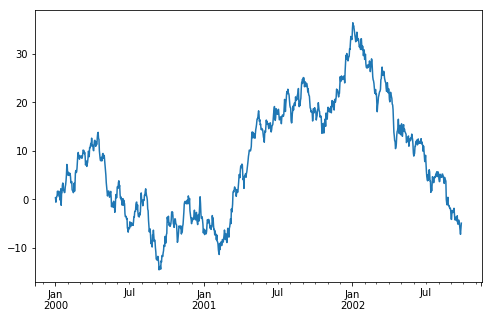

In [115]:
import matplotlib.pyplot as plt

%matplotlib inline

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot(figsize=(8, 5));

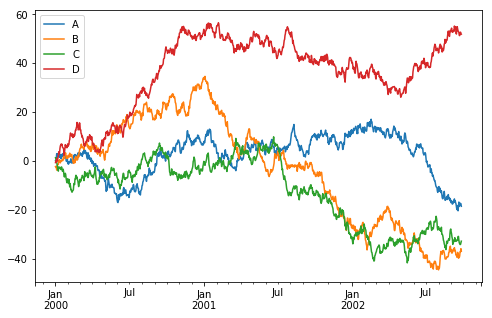

In [116]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(figsize=(8, 5));

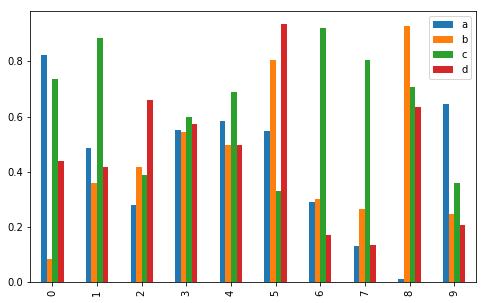

In [118]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar(figsize=(8, 5));

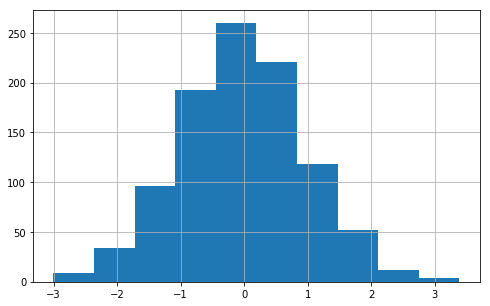

In [119]:
df['A'].diff().hist(figsize=(8, 5));

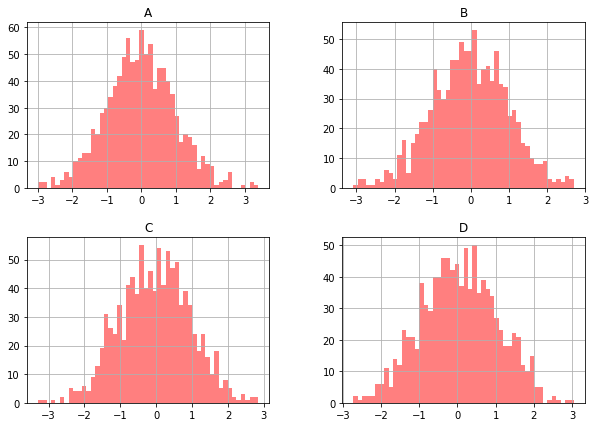

In [120]:
df.diff().hist(color='r', alpha=0.5, bins=50,  figsize=(10, 7));

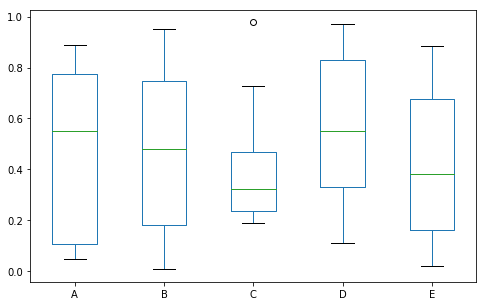

In [121]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box(figsize=(8, 5));

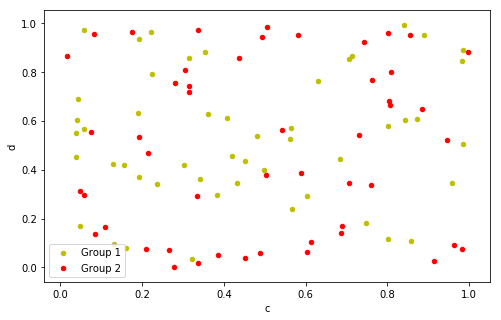

In [122]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
ax = df.plot.scatter(x='a', y='b', color='y', label='Group 1')
df.plot.scatter(x='c', y='d', color='r', label='Group 2', ax=ax, figsize=(8, 5));

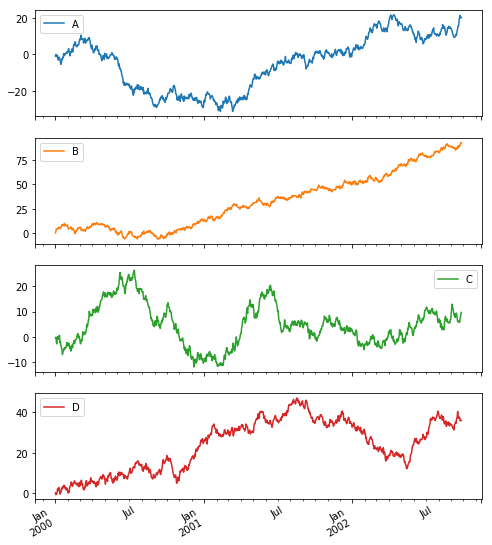

In [123]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(subplots=True, figsize=(8, 10));

Źródła:
- https://pandas.pydata.org/
- http://pandas.pydata.org/pandas-docs/stable/index.html

Zadania dla studentów:
- h5py (Ruchała)
- http://pbpython.com/visualization-tools-1.html
    - Seaborn (Krzyżek)
    - ggplot (Tymorek)
    - Bokeh (Onak)
    - PyGoogleChart (Kijak)
- Pillow (Winnicki, 03.01)
- scikit-image (Krzyżek)
- pygame (2 osoby) (Milowski 10.01, Ananchuk+inna biblioteka go gier 03.01)
- flask (Filar, 17.01)
- macierze (Kijak + Morzydusza, 03.01)